In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx

In [2]:
# Unit Vectors for defining reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])

In [3]:
# Axial dimensions on Shaft A1
a1 = 9 + 28.75 + 9 # [mm]
b1 = (13.25 - 9) + 24.25 + 30 / 2 # [mm]
zR1 = a1 + b1 # [mm]

In [4]:
# Axial dimension on shaft A1'
zR2 = 0 # [mm]
zR3 = 55 # [mm]

In [5]:
# Axial dimension on shaft A2
zR4 = 17 + 18 / 2 # [mm]
a2 = (46 - zR4) + 9.25 # [mm]
b2 = 16 + 25 + 16 # [mm]
c2 = (58.5 - 16) + 35 # [mm]


In [6]:
# Input
motor = pygritbx.Motor(name="M1", loc=0, power=9.25e3, n=3000, axis=k)

In [7]:
# Material
shaftMaterial = pygritbx.Material(name='34NiCrMo6', sigma_u=1050, sigma_y=950, sigma_Dm1=520, HB=0)
R1R4_material = pygritbx.Material(name='Steel', sigma_u=1060, sigma_y=950, sigma_Dm1=0, HB=335)
R2R3_material = pygritbx.Material(name='Steel', sigma_u=1950, sigma_y=1400, sigma_Dm1=0, HB=560)

In [8]:
# Gears
# R1
R1 = pygritbx.Gear(name="R1", axis=k, loc=zR1, m_n=2.5, z=18, psi=20, phi_n=20, Q_v=7, FW=30, material=R1R4_material)

# R2
R2 = pygritbx.Gear(name="R2", axis=k, loc=zR2, m_n=2.5, z=73, psi=-20, phi_n=20, Q_v=7, FW=30, material=R2R3_material)

# R3
R3 = pygritbx.Gear(name="R3", axis=k, loc=zR3, m_n=2.5, z=19, psi=-20, phi_n=20, Q_v=7, FW=30, material=R2R3_material)

# R4
R4 = pygritbx.Gear(name="R4", axis=k, loc=zR4, m_n=2.5, z=51, psi=20, phi_n=20, Q_v=7, FW=30, material=R1R4_material)

In [9]:
# Supports
# A (roller 30203)
A = pygritbx.Support("A", "Roller", "Tapered", "30203", "Explorer", 17, 40, 
                   13.25, 23.4e3, 18.6e3, 1.83e3, 15e3, 9, 0.35, 0, 1.7, 
                   0.9, 0, 0, 0, 0, -1, "B2B", k, 0)

# B (roller 30203)
B = pygritbx.Support("B", "Pin", "Tapered", "30203", "Explorer", 17, 40, 
                   13.25, 23.4e3, 18.6e3, 1.83e3, 15e3, 9, 0.35, 0, 1.7, 
                   0.9, 0, 0, 0, 0, 1, "B2B", k, a1)

# C (roller 30208)
C = pygritbx.Support("C", "Roller", "Tapered", "30208", "Explorer", 40, 80, 
                   19.75, 75.8e3, 68e3, 7.65e3, 7e3, 16, 0.37, 0, 1.6, 0.9,
                   0, 0, 0, 0, -1, "B2B", k, zR4 + a2)

# D (roller 30208)
D = pygritbx.Support("D", "Pin", "Tapered", "30208", "Explorer", 40, 80, 
                   19.75, 75.8e3, 68e3, 7.65e3, 7e3, 16, 0.37, 0, 1.6, 0.9,
                   0, 0, 0, 0, 1, "B2B", k, zR4 + a2 + b2)

# F
F = pygritbx.Support("", "", "", "", "", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                   0, 0, 0, 0, 0, 0, "",  k, 0)

In [10]:
# Output Component
output = pygritbx.Component("Output", None, k, zR4 + a2 + b2 + c2)

In [11]:
# Gearbox Configuration
# Shaft A1
A1 = pygritbx.Shaft(name="A1", inputs=[motor], outputs=[R1], axis=k, material=shaftMaterial, sups=np.array([A, B]), loc=[0, 0, 0])
# Mesh M1
M1 = pygritbx.GearMesh(name="M1", drivingGear=R1, drivenGear=R2, axis=-j, type="External")
# Shaft A1'
A1_p = pygritbx.Shaft("A1'", [R2], [R3], -k, shaftMaterial, np.array([F, F]))
# Mesh M2
M2 = pygritbx.GearMesh("M2", R3, R4, j, "External")
# Shaft A2
A2 = pygritbx.Shaft("A2", [R4], [output], k, shaftMaterial, np.array([C, D]))

In [12]:
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.
Checking torque equilibrium for R1.
R1 does not mainatain a torque equilibrium.
Checking solvability for R1.
Solving forces on R1 due to mesh M1.
Checking torque equilibrium for R1.
R1 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Axial reaction forces on A1: Case 1a
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [13]:
R1.EFs[0].force, R1.ETs[0].torque * 2 / R1.d * 1e3

(array([-1229.68863259,   476.29410913,   447.57005968]),
 array([   -0.        ,    -0.        , -1229.68863259]))

In [14]:
A.F_tot.force, B.F_tot.force

(array([-1144.20225706,   672.4152129 , -1223.22086704]),
 array([ 2373.89088965, -1148.70932203,   775.65080736]))

In [15]:
R2.solve()

Checking torque equilibrium for R2.
Checking solvability for R2.
Solving torque equilibrium for R2.
Checking torque equilibrium for R2.
R2 mainatains a torque equilibrium.


In [16]:
A1_p.solve()

Checking torque equilibrium for A1'.
A1' does not mainatain a torque equilibrium.
Checking solvability for A1'.
Solving torque equilibrium for A1'.
Torque equilibrium for A1' is solved.
Checking torque equilibrium for R3.
R3 does not mainatain a torque equilibrium.
Checking solvability for R3.
Solving forces on R3 due to mesh M2.
Checking torque equilibrium for R3.
R3 mainatains a torque equilibrium.
Checking force equilibrium on A1'.
A1' does not maintain a force equilibrium.
Reaction forces on A1' won't be calculated.


In [17]:
R3.solve()

Checking torque equilibrium for R3.
R3 mainatains a torque equilibrium.
Nothing to be solved for R3.


In [18]:
R4.solve()

Checking torque equilibrium for R4.
Checking solvability for R4.
Solving torque equilibrium for R4.
Checking torque equilibrium for R4.
R4 mainatains a torque equilibrium.


In [19]:
Fout_r = np.abs(np.sum(R4.ETs[0].torque)) / 0.1 * j
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (-k)
Fout = pygritbx.Force(Fout_a + Fout_r, output.abs_loc)
A2.outputs[0].updateEFs([Fout])

In [20]:
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Axial reaction forces on A2: Case 2a
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [21]:
# Shaft A2: profile for static verification
statProfile = pygritbx.ShaftProfile(np.array([34, 35, 35, 30, 30, 35, 35, 40, 40, 34, 34, 32, 32, 27, 27, 32, 32, 31]) / 2, 
                                  np.array([0, 1, 11.9, 12, 39.9, 40, 45.9, 46, 132.9, 133, 158.4, 158.5, 178.4, 178.5, 208.4, 208.5, 222, 223]))
statProfile.AddFillet(1, [2], 45, 18.5)
statProfile.AddFillet(1, [1], 134, 18)
statProfile_refined = statProfile.refineProfile(0.1)
A2.setProfile(statProfile_refined)
A2.profile.CalculateSectionProperties()

In [22]:
# Shaft A2: define sections
# v1
v1 = pygritbx.ShaftSection('V1', np.array([0, 0, 26]), 30, 0.8, shaftMaterial)
v1.AppendKf(np.array([1.6, 2]), np.array(["Bending", "Torsion"]))


In [23]:
# v2
v2 = pygritbx.ShaftSection('V2', np.array([0, 0, 46]), 40, 0.8, shaftMaterial)
v2.AddNotchSensitivity(1, A2.material.sigma_u)
v2.AddGeometricStressRaiser(1/35, 40/35)

In [24]:
# v3
v3 = pygritbx.ShaftSection('V3', np.array([0, 0, 133]), 40, 0.8, shaftMaterial)
v3.AddNotchSensitivity(1, A2.material.sigma_u)
v3.AddGeometricStressRaiser(1/34, 40/34)

In [25]:
userSections = np.array([v1, v2, v3])
A2.addSections(userSections)

In [26]:
# Internal loads
A2.calculateInternalLoads(np.array([i, j, k]))

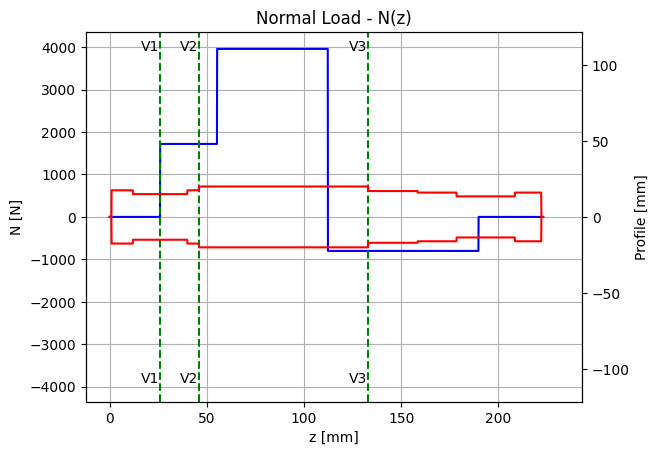

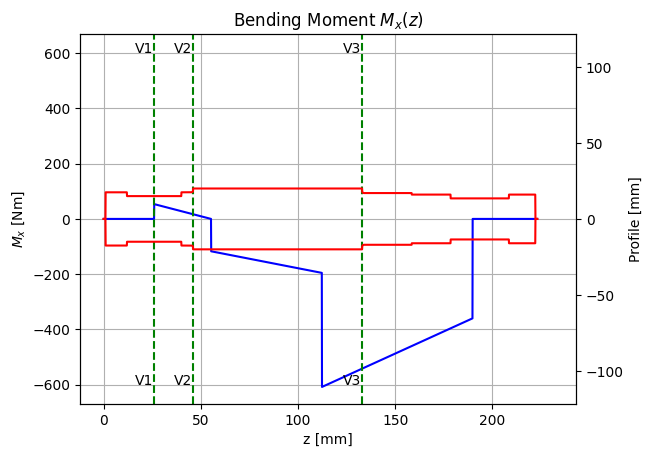

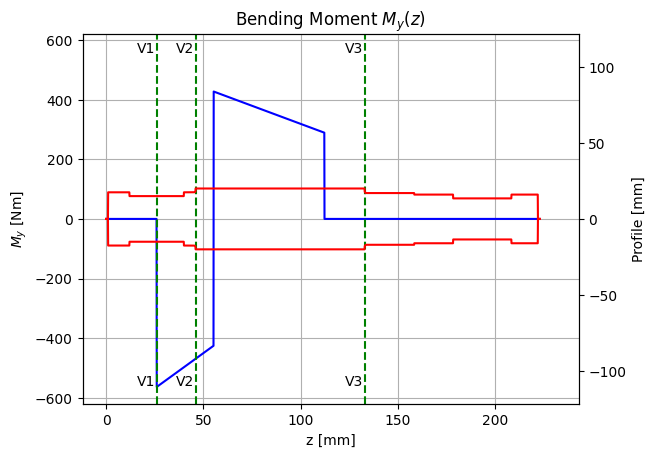

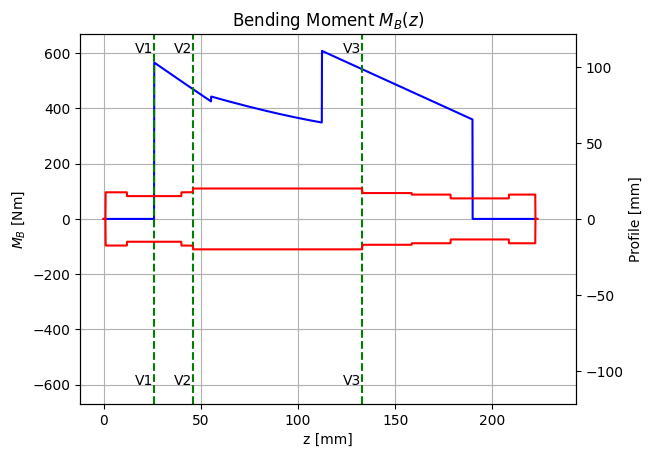

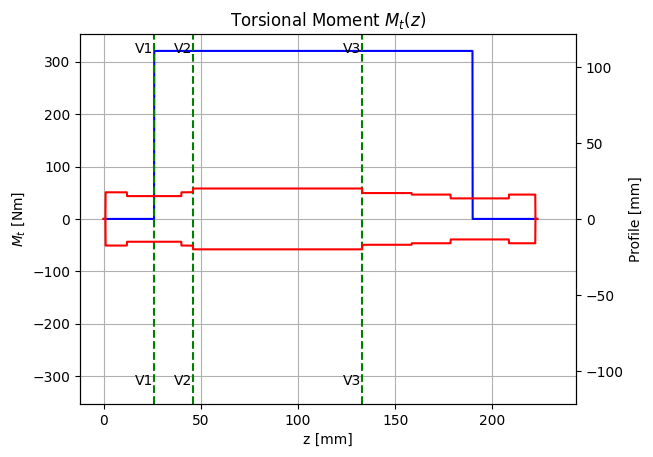

In [27]:
# Plot internal loads
A2.plotInternalLoads()

In [28]:
# Calculate stresses
A2.calculateStresses()
A2.calculateEquivalentAndIdealStress()

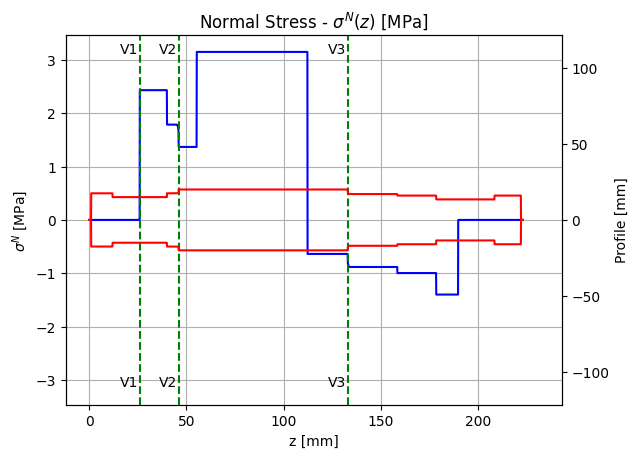

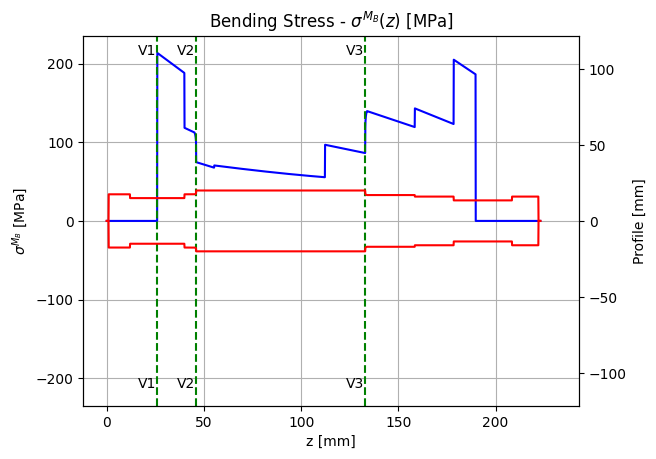

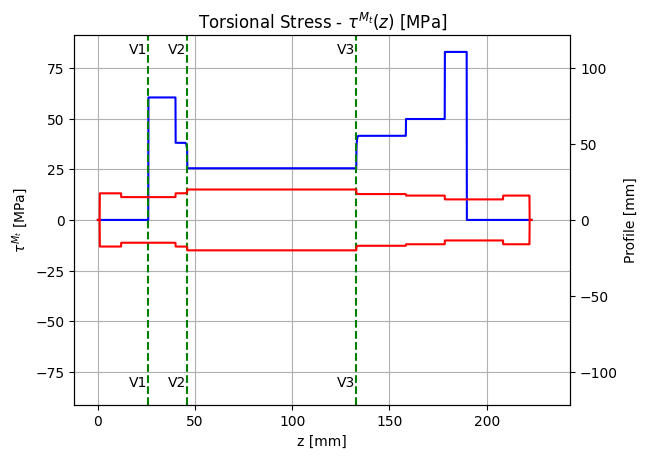

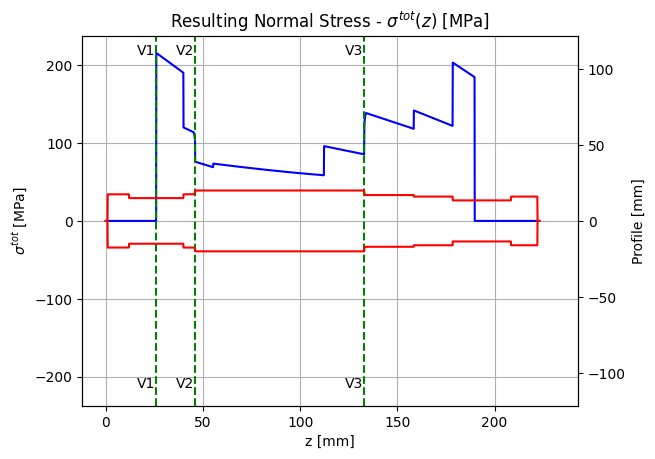

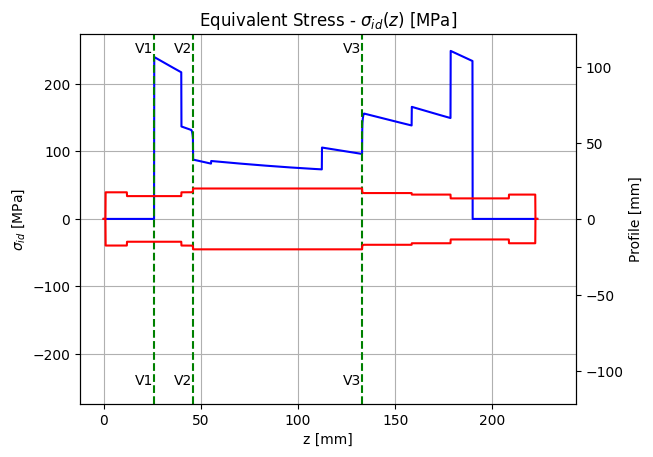

In [29]:
A2.plotStresses()

In [30]:
# Static safety factors
A2.calculateStaticSafetyFactor(sections=userSections)

In [31]:
userSections[0].staticSF, userSections[1].staticSF, userSections[2].staticSF

(np.float64(3.958481826029704),
 np.float64(10.801788469673486),
 np.float64(7.186445726687778))

In [32]:
# Shaft A2: profile for fatigue verification
fatigueProfile = pygritbx.ShaftProfile(np.array([34, 35, 35, 40, 40, 34, 34, 32, 32, 31]) / 2,
                                     np.array([0, 1, 45.9, 46, 132.9, 133, 158.4, 158.5, 222, 223]))
fatigueProfile.AddFillet(1, [2], 45, 18.5)
fatigueProfile.AddFillet(1, [1], 134, 18)
fatigueProfile_refined = fatigueProfile.refineProfile(0.1)
A2.setProfile(fatigueProfile_refined)
A2.profile.CalculateSectionProperties()
A2.sections[0].d = 35
userSections[0].d = 35

In [33]:
# Recalculate internal loads and stresses
A2.calculateInternalLoads(np.array([i, j, k]))
A2.calculateStresses()

In [34]:
# Recalculate total and equivalent stress
A2.calculateEquivalentAndIdealStress()

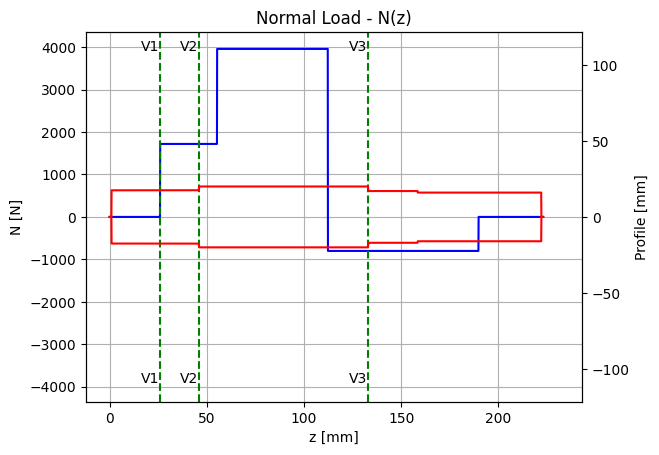

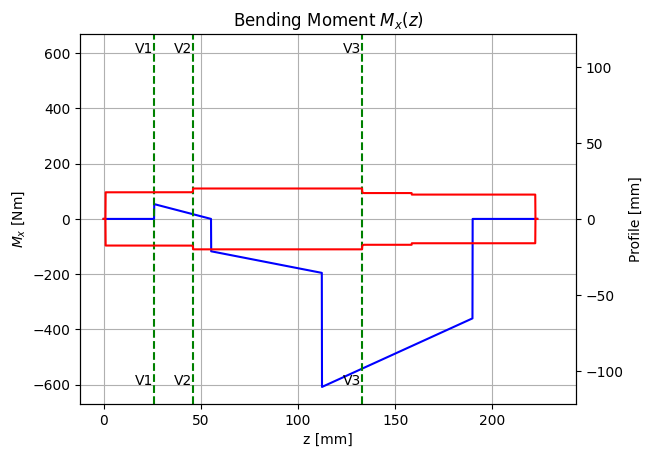

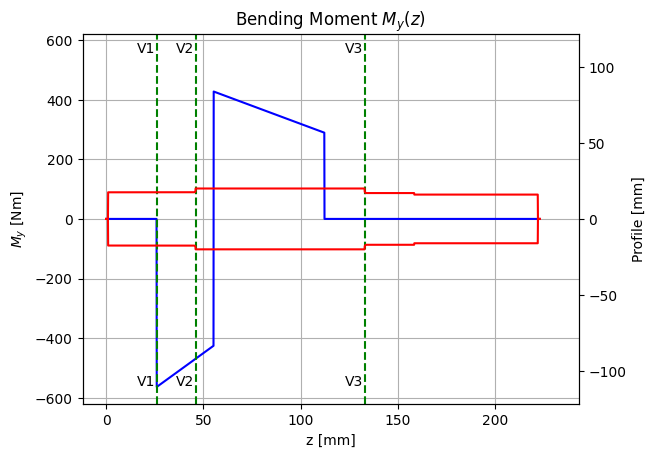

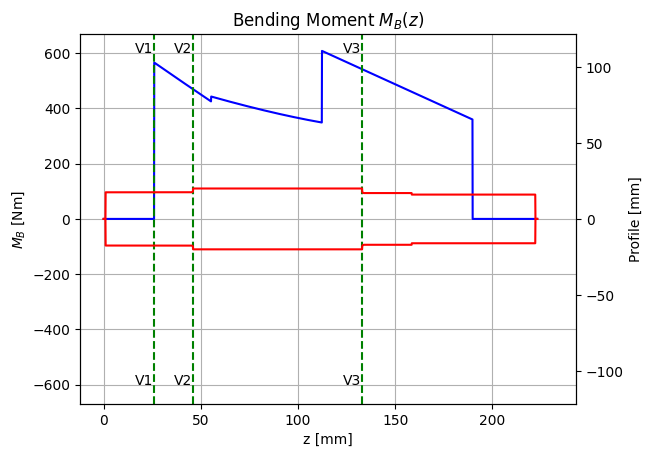

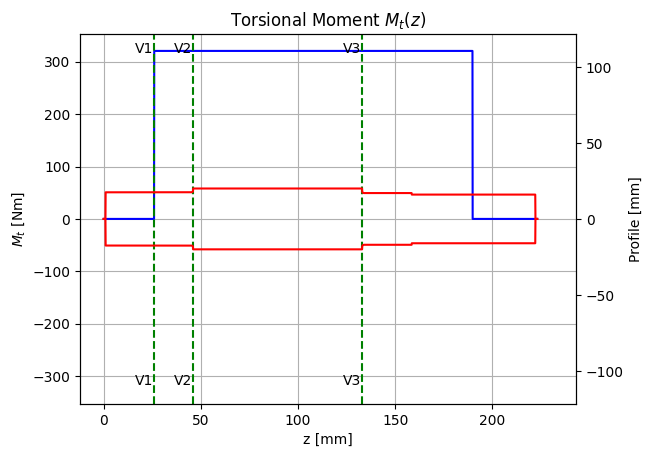

In [35]:
# replot internal loads and stress
A2.plotInternalLoads()

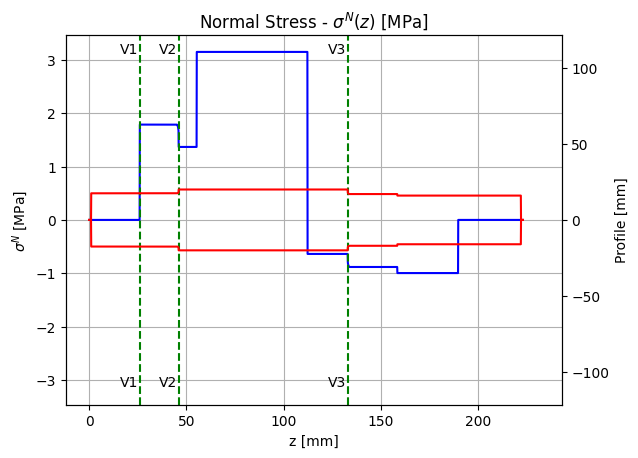

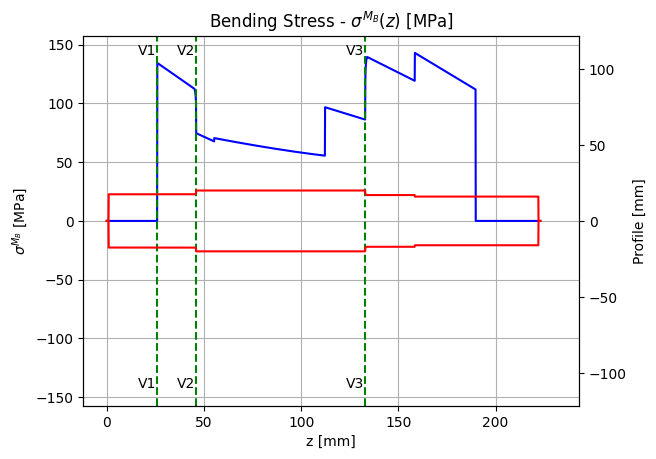

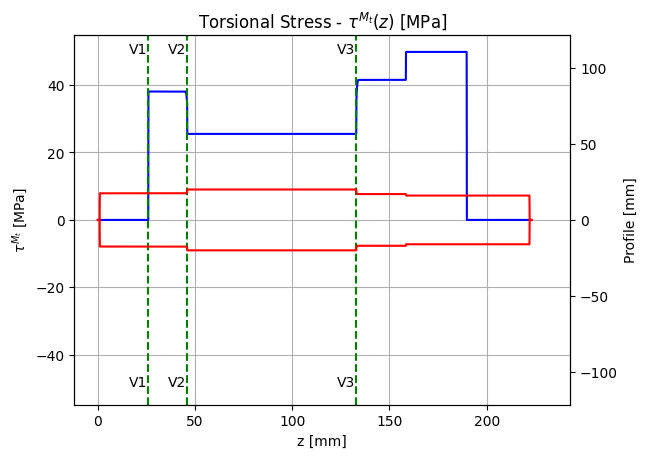

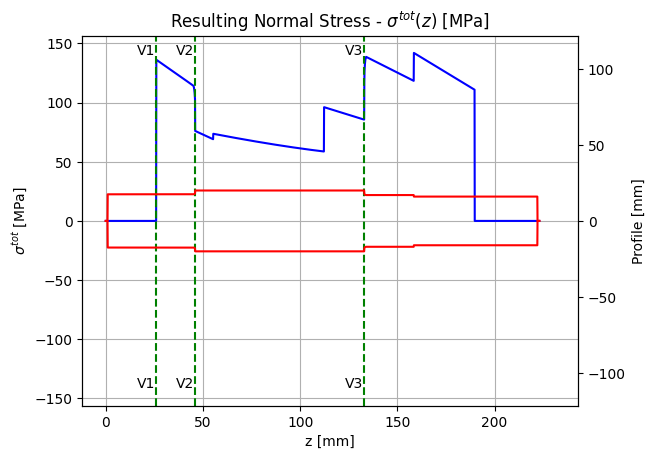

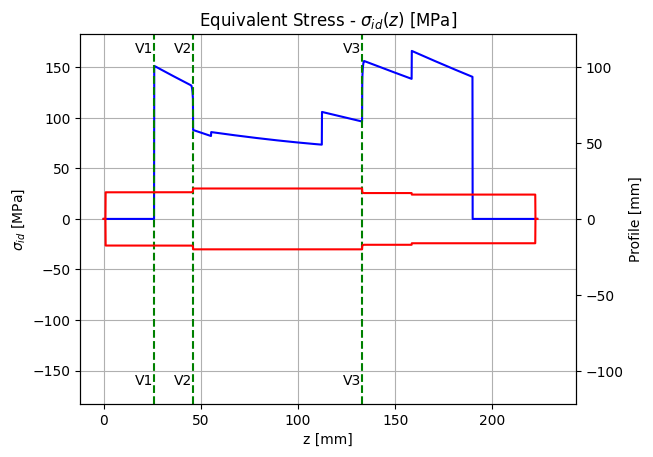

In [36]:
# Replot stresses
A2.plotStresses()

In [37]:
# Calculate mean and alternating stresses
A2.calculateMeanAlternatingStress(userSections)

In [38]:
# Fatigue limit corrector factor
A2.insertFLCF(userSections)

In [39]:
# Equivalent mean and alternating stress
A2.calculateEquivalentStresses(userSections)

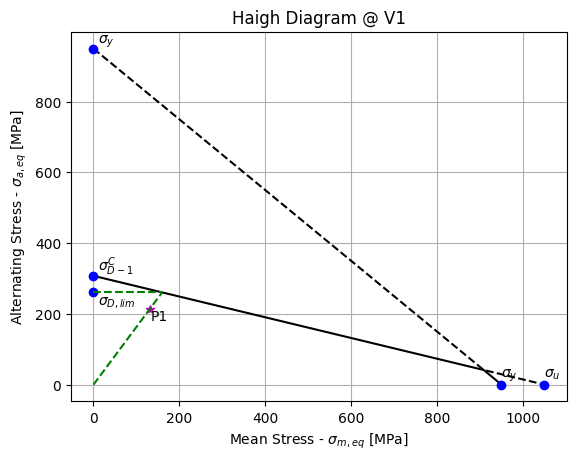

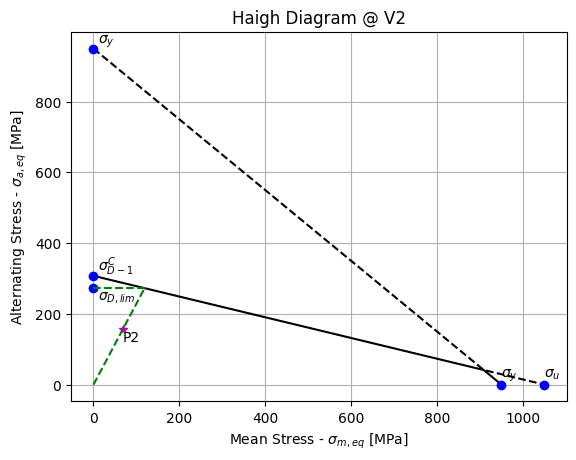

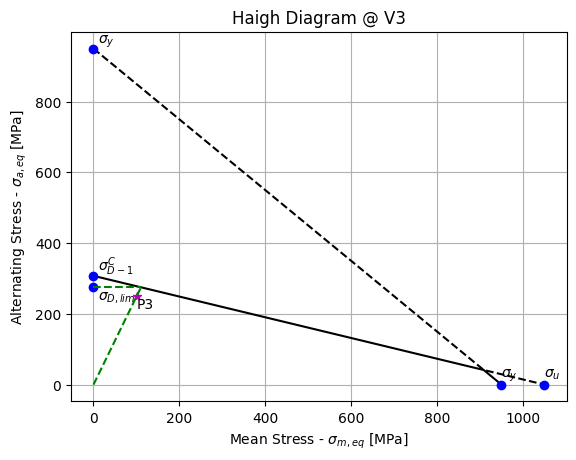

In [40]:
# Plot haigh diagram
for section in userSections:
    section.PlotHaighDiagram()

In [41]:
# Fatigue sagety factor
for section in A2.sections:
    section.CalculateFatigueSF()
    print(f"{section.name}: {section.fatigueSF}")

V1: 1.2120675612400234
V2: 1.7396945861675268
V3: 1.104285094317897


In [42]:
# Maximum tooth gear bending stress
R1.calculateSigmaMaxFatigue(M1, "Uniform", "Uniform", 35, 1, "uncrowned teeth", a1 + b1 + 50, "Commercial, enclosed units")
R3.calculateSigmaMaxFatigue(M2, "Uniform", "Uniform", 30, 1, "uncrowned teeth", 70, "Commercial, enclosed units")

In [43]:
R1.sigma_max_fatigue, R3.sigma_max_fatigue

(np.float64(125.96718747171059), np.float64(187.76923889504155))

In [44]:
# Bending safety factor
R1.calculateBendingSF(320, 1.3558, -0.0178, 1e8, 60, 0.99)
R3.calculateBendingSF(450, 1.3558, -0.0178, 1e8, 60, 0.99)

In [45]:
R1.bendingSF, R3.bendingSF

(array([2.48135085]), array([2.34090451]))

In [46]:
# Maximum gear contact (pitting resistance) stress
R1.calculateSigmaMaxPitting(M1, 1)
R3.calculateSigmaMaxPitting(M2, 1)

In [47]:
R1.sigma_max_pitting, R3.sigma_max_pitting

(np.float64(378.19293828137035), np.float64(672.0358490964566))

In [48]:
# Wear safety factor
R1.calculateWearSF(860, 1.4488, -0.023, 1e8, M1)
R3.calculateWearSF(1360, 1.4488, -0.023, 1e8, M2)

In [49]:
R1.wearSF, R3.wearSF

(array([2.15671855]), array([1.9410806]))

In [50]:
# Minimum load verifivation
A.calculateMinimumLoad()
B.calculateMinimumLoad()
C.calculateMinimumLoad()
D.calculateMinimumLoad()

A satisfies minimium load condition.
B satisfies minimium load condition.
C satisfies minimium load condition.
D satisfies minimium load condition.


In [51]:
A.Frm, B.Frm, C.Frm, D.Frm

(397.8, 397.8, 1288.6000000000001, 1288.6000000000001)

In [52]:
# Equivalent static load
A.calculateEquivalentStaticLoad()
B.calculateEquivalentStaticLoad()
C.calculateEquivalentStaticLoad()
D.calculateEquivalentStaticLoad()

In [53]:
A.s0, B.s0, C.s0, D.s0

(np.float64(4.088321502786023),
 np.float64(5.813241321720954),
 np.float64(5.329419306991341),
 np.float64(4.889194512629891))

In [54]:
# Reliability factor
A.calculateA1(95)
B.calculateA1(95)
C.calculateA1(95)
D.calculateA1(95)

In [55]:
A.a1, B.a1, C.a1, D.a1

(np.float64(0.64), np.float64(0.64), np.float64(0.64), np.float64(0.64))

In [56]:
# Define oil of choice
oil = pygritbx.Oil("ISO VG 100", 60, 15, 45)

In [57]:
# Bearing equivalent dynamic load
A.calculateEquivalentDynamicLoad()
B.calculateEquivalentDynamicLoad()
C.calculateEquivalentDynamicLoad()
D.calculateEquivalentDynamicLoad()

In [58]:
A.P, B.P, C.P, D.P

(np.float64(2310.592532663581),
 np.float64(2501.5061999167256),
 np.float64(10744.574889952723),
 np.float64(6448.48620431241))

In [59]:
# Contamination factor
A.calculateEtaC("Slight contamination")
B.calculateEtaC("Slight contamination")
C.calculateEtaC("Slight contamination")
D.calculateEtaC("Slight contamination")

In [60]:
A.eta_c, B.eta_c, C.eta_c, D.eta_c

(0.4, 0.4, 0.4, 0.4)

In [61]:
# Lubrication, contamination, and fatigue limit factor
A.a_skf = 2
B.a_skf = 5
C.a_skf = 1
D.a_skf = 2

In [62]:
A.n, B.n, C.n, D.n

(3000.0, 3000.0, 275.5842062852538, 275.5842062852538)

In [63]:
# Calculate bearing life
A.calculateBearingLife()
B.calculateBearingLife()
C.calculateBearingLife()
D.calculateBearingLife()

In [64]:
A.L_10m, A.L_10mh, B.L_10m, B.L_10mh, C.L_10m, C.L_10mh, D.L_10m, D.L_10mh

(np.float64(2876.4154279656086),
 np.float64(15980.08571092005),
 np.float64(5519.048675050891),
 np.float64(30661.38152806051),
 np.float64(430.96949926555936),
 np.float64(26063.993595933687),
 np.float64(4726.954314295386),
 np.float64(285874.77115207486))